# Clustering & Measurement

## Import Framework

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## Get Dataset

In [ ]:
# dataset
x, y = make_blobs(n_samples=100, random_state=0)
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

## Normalize
- MinMaxScaler 최대 최소 정규화
- Standard Scaler 표준화

In [ ]:
# Normalize
scaler_MMS = MinMaxScaler().fit(x)
x_scaled_MMS = scaler_MMS.transform(x)

scaler_ss = StandardScaler().fit(x)
x_scaled_ss = scaler_ss.transform(x) 

## Clustering
- DBSCAN  
DBSCAN fit 반환값: numpy 
  
- KMeans  
KMeans fit 반환값: pandas.DataFrame  
kmeans_result.labels_ => 결과 값(0, 1, 2.. 값으로 분류된 클래스들의 numpy를 반환)  
- ...

In [ ]:
# Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(x)

kmeans_x_scaled = KMeans(n_clusters=2).fit(x)

## Visualization with Matplotlib
- 특징값이 2차원 데이터일 경우 점들의 군집화 형태를 그려줌

In [ ]:
# visualization

## DBSCAN의 경우
df = np.hstack([x, dbscan_x.reshape(-1, 1)]) # x_scaled_ss 오른쪽에 1열 붙이기

## KMeans의 경우
df = np.hstack([x, kmeans_x.labels_.reshape(-1, 1)])



df_ft0 = df[df[:,2]==0, :] # 클러스터 0 추출

df_ft1 = df[df[:,2]==1, :] # 클러스터 1 추출


# matplotlib로 그래프 그리기

plt.scatter(df_ft0[:, 0], df_ft0[:, 1], label='cluster 0', cmap='Pairs') # x, y, label, 색상

plt.scatter(df_ft1[:, 0], df_ft1[:, 1], label='cluster 1', cmap='Pairs')

plt.xlabel('feature 0')

plt.ylabel('feature 1')

plt.legend()

plt.show()

## Example1

In [81]:
# get Data
x, y = make_blobs(n_samples=100, random_state=0)

# 표준화
scaler_ss = StandardScaler().fit(x)
x_scaled_ss = scaler_ss.transform(x) 

# DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
dbscan_x = dbscan.fit_predict(x)

# KMEANS
kmeans_x = KMeans(n_clusters=3).fit(x)

In [83]:
print("Clusters DBSCAN: \n{}".format(dbscan_x))
print("Clusters kmeans : \n{}".format(kmeans_x.labels_))
print("y : \n{}".format(y)) #  정답 numpy

Clusters DBSCAN: 
[-1  1 -1  0  0  1  2  0  3  1  1 -1 -1 -1  2 -1 -1  0 -1  2 -1 -1 -1  0
  3  3  3  3 -1  0 -1 -1 -1  4 -1  1  1  3  3 -1 -1 -1  3 -1  1  1 -1 -1
  2  0  1  3  1  3 -1 -1 -1 -1  1 -1  3  2  2 -1  2  3  1 -1  3  4  0 -1
 -1 -1 -1 -1  1  1 -1 -1 -1  1  3 -1 -1  1  1  0  3  1 -1 -1  0  2  2  0
  1  4 -1  2]
Clusters kmeans : 
[2 0 2 1 1 0 1 1 2 0 0 0 2 0 1 2 1 1 1 1 1 1 1 1 2 2 2 2 1 1 0 2 2 0 1 0 0
 2 2 1 1 2 2 0 0 0 2 2 1 1 0 2 0 2 1 1 2 2 0 2 2 1 1 1 1 2 0 1 2 0 1 2 1 2
 0 0 0 0 1 2 0 0 2 0 0 0 0 0 2 0 2 2 1 1 1 1 0 0 1 1]
y : 
[1 0 1 0 0 0 2 2 1 0 0 0 1 0 2 1 2 0 2 2 2 2 2 0 1 1 1 1 2 2 0 1 1 0 2 2 0
 1 1 2 2 1 1 0 0 0 1 1 2 2 2 1 0 1 2 2 1 1 0 1 1 2 2 2 2 1 0 2 1 0 2 0 0 1
 1 0 0 0 2 1 0 0 1 0 1 0 0 0 1 0 1 1 2 2 2 2 0 0 2 2]


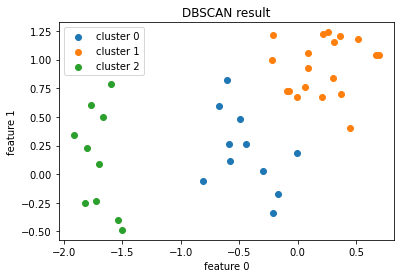

In [85]:
# visualization

## DBSCAN의 경우
df = np.hstack([x_scaled_ss, dbscan_x.reshape(-1, 1)]) # x_scaled_ss 오른쪽에 1열 붙이기

df_ft0 = df[df[:,2]==0, :] # 클러스터 0 추출
df_ft1 = df[df[:,2]==1, :] # 클러스터 1 추출
df_ft2 = df[df[:,2]==2, :] # 클러스터 2 추출


# matplotlib로 그래프 그리기

plt.scatter(df_ft0[:, 0], df_ft0[:, 1], label='cluster 0', cmap='Pairs') # x, y, label, 색상
plt.scatter(df_ft1[:, 0], df_ft1[:, 1], label='cluster 1', cmap='Pairs')
plt.scatter(df_ft2[:, 0], df_ft2[:, 1], label='cluster 2', cmap='Pairs')

plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend()
plt.title("DBSCAN result")
plt.show()

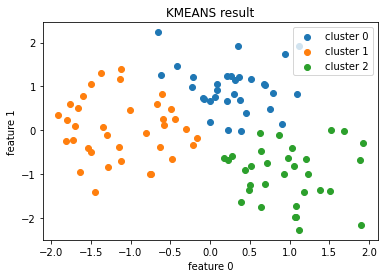

In [86]:
# visualization

## KMEANS result
df = np.hstack([x_scaled_ss, kmeans_x.labels_.reshape(-1, 1)]) # x_scaled_ss 오른쪽에 1열 붙이기

df_ft0 = df[df[:,2]==0, :] # 클러스터 0 추출
df_ft1 = df[df[:,2]==1, :] # 클러스터 1 추출
df_ft2 = df[df[:,2]==2, :] # 클러스터 2 추출


# matplotlib로 그래프 그리기

plt.scatter(df_ft0[:, 0], df_ft0[:, 1], label='cluster 0', cmap='Pairs') # x, y, label, 색상
plt.scatter(df_ft1[:, 0], df_ft1[:, 1], label='cluster 1', cmap='Pairs')
plt.scatter(df_ft2[:, 0], df_ft2[:, 1], label='cluster 2', cmap='Pairs')

plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend()
plt.title("KMEANS result")
plt.show()

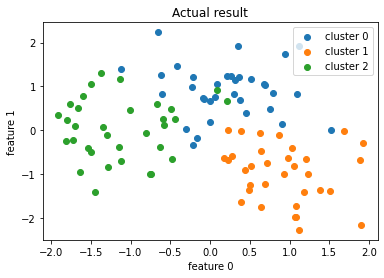

In [87]:
# visualization

## DBSCAN의 경우
df = np.hstack([x_scaled_ss, y.reshape(-1, 1)]) # x_scaled_ss 오른쪽에 1열 붙이기

df_ft0 = df[df[:,2]==0, :] # 클러스터 0 추출
df_ft1 = df[df[:,2]==1, :] # 클러스터 1 추출
df_ft2 = df[df[:,2]==2, :] # 클러스터 2 추출

# matplotlib로 그래프 그리기

plt.scatter(df_ft0[:, 0], df_ft0[:, 1], label='cluster 0', cmap='Pairs') # x, y, label, 색상
plt.scatter(df_ft1[:, 0], df_ft1[:, 1], label='cluster 1', cmap='Pairs')
plt.scatter(df_ft2[:, 0], df_ft2[:, 1], label='cluster 2', cmap='Pairs')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend()
plt.title("Actual result")
plt.show()

## Example 2
- 특징 벡터가 3차원일 경우

In [75]:
df = pd.DataFrame(columns=['x', 'y', 'z'])

df.loc[0] = [3, 1, 3]
df.loc[1] = [4, 1, 1]
df.loc[2] = [3, 2, 7]
df.loc[3] = [4, 2, 12]
df.loc[4] = [10, 5, 4]
df.loc[5] = [10, 6, 2]
df.loc[6] = [11, 5, 1]
df.loc[7] = [11, 6, 3]
df.loc[8] = [15, 1, 6]
df.loc[9] = [15, 2, 2]
df.loc[10] = [16, 1, 1]
df.loc[11] = [16, 2, 2]

df.head(20) # 데이터 프레임 차트 형식 출력
data_points = df.to_numpy()
#kmeans = KMeans(n_clusters=3).fit(data_points)
#df['cluster_id'] = kmeans.labels_
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(df)

df = np.hstack([df, clusters.reshape(-1, 1)])
pd.DataFrame(df).head(12)


,0,1,2,3
0,3,1,3,-1
1,4,1,1,-1
2,3,2,7,-1
3,4,2,12,-1
4,10,5,4,-1
5,10,6,2,-1
6,11,5,1,-1
7,11,6,3,-1
8,15,1,6,-1
9,15,2,2,-1


## Accuracy 계산 함수
- 인자 : 정답 numpy 리스트 / 예측 numpy 리스트
- 결과 : 0 ~ 1 사이 값 (1에 가까울 수록 정확도 높다)
- 실제 데이터 정답 라벨링이 필요하다.

In [76]:
# Accuracy를 가져오는 함수
def getAccuracy(data_y, pred_y):
    count = 0
    bool_array = (data_y == pred_y)
    for correct in bool_array:
        if(correct):
            count += 1
    return count / pred_y.size
answer = np.array([1, 1, 0,1, 1, 0, 0, 0, 2, 2, 2, 2])
print("KMeans accuracy: \n{}".format(getAccuracy(answer, clusters)))

KMeans accuracy: 
0.0


In [102]:
# 정답 레이블 만들기
## 원하는 클래스 레이블의 리스트를 넘긴다.

def getClassLabelFor(list):
    y=np.array([])
    for i in list:
        y_=np.full((1, 190), i)[0]
        y=np.hstack([y, y_])
    
    return y

classes = [0, 1, 5]
y=getClassLabelFor(classes)
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.